In [1]:
import sys,glob,datetime,os,gc,importlib,pickle,cftime,re,string
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from distinctipy import distinctipy
from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.api as statsmodels
from scipy.stats import percentileofscore


import cartopy

import itertools
import warnings
warnings.filterwarnings("ignore")

ERROR 1: PROJ: proj_create_from_database: Open of /home/u/u290372/.conda/envs/py_main/share/proj failed


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('/home/u/u290372/scripts/')
from cartopy_features import *
import _regions_ar6wg1 
sys.path.append('/home/u/u290372/scripts/cmip6_ensemble_scripts')
import _paths as _paths; importlib.reload(_paths)
import _regTS_ensemble as _regTS_ensemble

In [19]:
region_name = 'WAF-land'

In [10]:
indicator = 'tas'

In [6]:
scenario = 'ssp119'

In [11]:
scenario = '*'

In [20]:
oo = _regTS_ensemble.regTS_ensemble(region_name=region_name, realm='Amon', indicator=indicator, scenario=scenario, esm='*', run='*')
oo.load_existing_object()

True

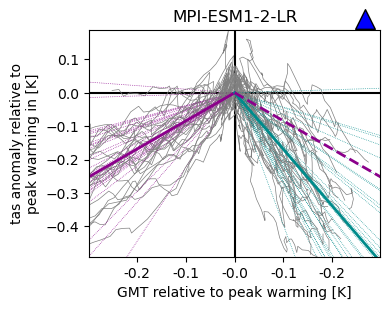

In [21]:
model = 'MPI-ESM1-2-LR'
ax = oo.plot_vs_gmt(oo.get_smrs_for_model(model))
ax.set_title('%s' %(model))
ax.scatter(0.95, 1.05, transform=ax.transAxes, marker=oo._marker_d[model], color=oo._color_d[model], 
           edgecolor='k', alpha=1, s=200, clip_on=False)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/vs_GMT_%s_%s_%s.pdf' %(indicator,region_name,model),  bbox_inches='tight')

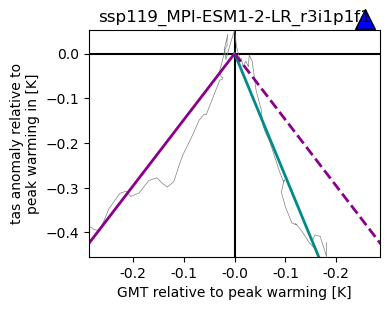

In [26]:
smr = 'ssp119_MPI-ESM1-2-LR_r3i1p1f1'
ax = oo.plot_vs_gmt([smr])
ax.set_title('%s' %(smr))
ax.scatter(0.95, 1.05, transform=ax.transAxes, marker=oo._marker_d[model], color=oo._color_d[model], 
           edgecolor='k', alpha=1, s=200, clip_on=False)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/vs_GMT_%s_%s_%s.pdf' %(indicator,region_name,smr),  bbox_inches='tight')

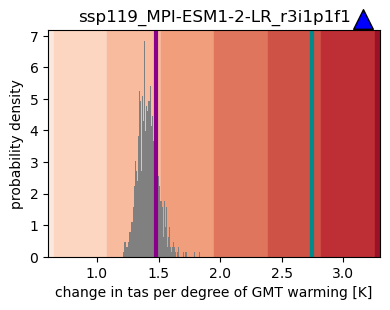

In [27]:
ax = oo.plot_trend_hists(smr)
ax.set_title('%s' %(smr))
ax.scatter(0.95, 1.05, transform=ax.transAxes, marker=oo._marker_d[model], color=oo._color_d[model], 
           edgecolor='k', alpha=1, s=200, clip_on=False)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/vs_GMT_hist_%s_%s_%s.pdf' %(indicator,region_name,smr),  bbox_inches='tight')

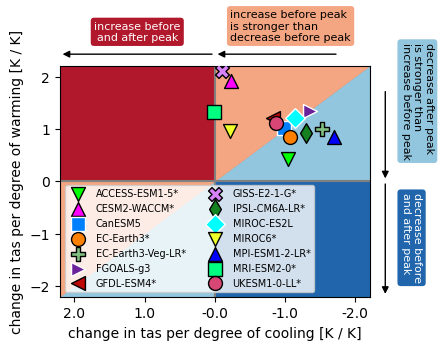

In [46]:
ax = oo.plot_vs_gmt_scatter(explainers=True)
ax.legend(ncol=2, fontsize=7)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/vs_GMT_scatter_%s_%s.pdf' %(indicator,region_name),  bbox_inches='tight')

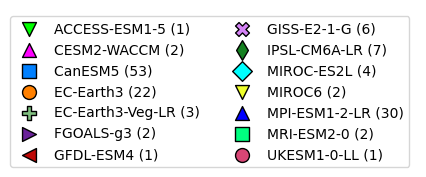

In [29]:
oo.plot_model_legend()
plt.savefig('/work/uc1275/u290372/overshoot/plots/model_legend.pdf', bbox_inches='tight', transparent=True)

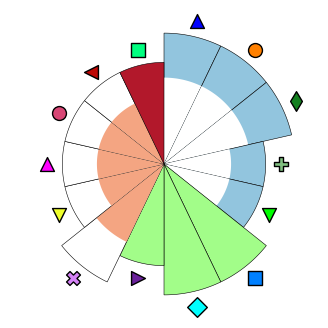

In [30]:
oo.plot_behaviour_pie(markers=True)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/pie_%s_%s.pdf' %(indicator,region_name),  bbox_inches='tight')

In [10]:
model = 'MIROC-ES2L'

In [24]:
model = 'MPI-ESM1-2-LR'

In [12]:
model = 'EC-Earth3'

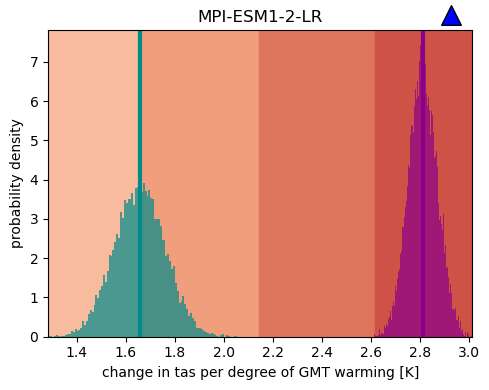

In [40]:
ax = oo.plot_trend_hists(model)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/trend_hist_%s_%s_%s.pdf' %(indicator,region_name,model), bbox_inches='tight')

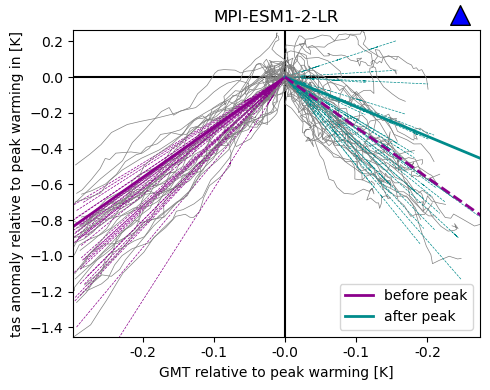

In [41]:
ax = oo.plot_vs_gmt_stat(model=model)
plt.savefig('/work/uc1275/u290372/overshoot/plots/explainer/evolution_%s_%s_%s.pdf' %(indicator,region_name,model), bbox_inches='tight')

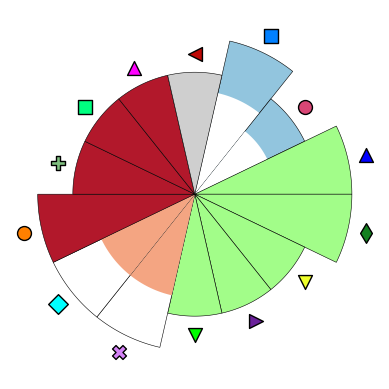

In [13]:
oo.plot_behaviour_pie(markers=True, threshold=45)

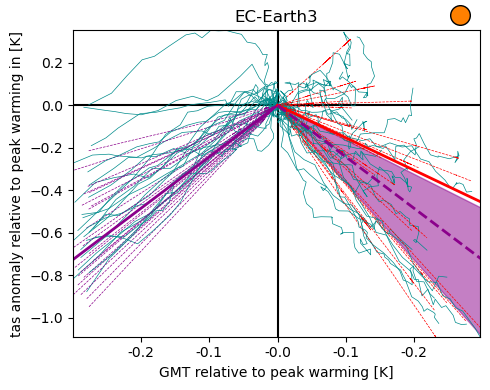

In [145]:
ax = oo.plot_vs_gmt(model=model)